#### `pandas_datareader`를 사용해 NVIDA 주가 데이터 로드

In [7]:
from datetime import datetime
import pandas as pd
import pandas_datareader.data as reader
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

register_matplotlib_converters()

In [8]:
# 2018. 10 ~ 2020. 10 까지의 NVIDA 주가
company = 'NVIDA'
start = datetime(2018, 10, 1)
end = datetime(2020, 10, 1)

data = reader.DataReader("NVDA", "yahoo", start, end)

In [9]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,515.340027,489.829987,497.899994,514.950012,14700400.0,514.950012
2020-09-28,522.070007,510.000000,521.609985,521.400024,14345200.0,521.400024
2020-09-29,537.710022,517.330017,517.500000,529.030029,15536500.0,529.030029
2020-09-30,544.900024,526.010010,526.299988,541.219971,17206100.0,541.219971
2020-10-01,550.510010,538.429993,550.320007,544.580017,13125100.0,544.580017


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2018-10-01 to 2020-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       505 non-null    float64
 1   Low        505 non-null    float64
 2   Open       505 non-null    float64
 3   Close      505 non-null    float64
 4   Volume     505 non-null    float64
 5   Adj Close  505 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB


In [11]:
data[data['Volume'] == 0]        # 주말엔 거래가 없고 그럴땐 값이 0이므로
#data = data[data['Volume'] != 0]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


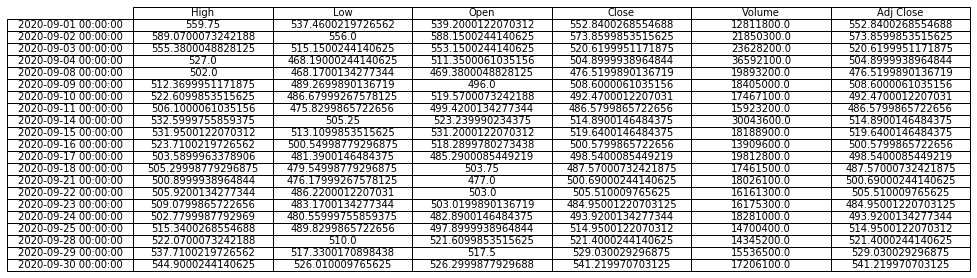

In [12]:
from pandas.plotting import table

plt.figure(figsize=(15,4))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, data['2020-09'], loc='center', cellLoc = 'center', rowLoc = 'center')

plt.savefig('{company}_table.png'.format(company=company))
plt.show()

#### 5봉 데이터 그래프 그리기

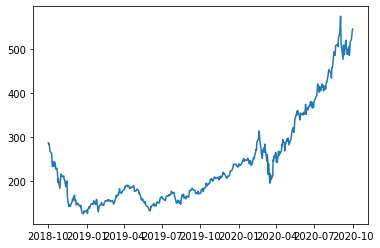

In [13]:
plt.plot(data['Adj Close'])        # 수정 종가

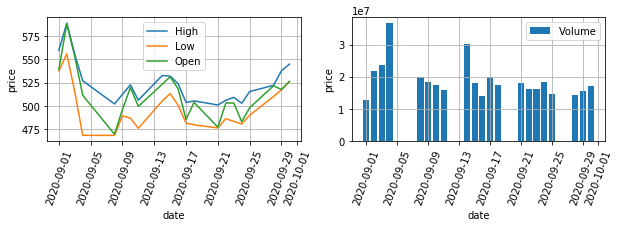

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
data_r = data['2020-09']

plt.subplot(2,2,1)
for col in ['High', 'Low', 'Open']:
    plt.plot(data_r.index, data_r[col], label=col)

plt.legend(loc='best')
plt.xlabel('date')
plt.xticks(rotation=70)
plt.ylabel('price')
plt.grid()

plt.subplot(2,2,2)
plt.bar(data_r.index, data_r['Volume'], label='Volume')
plt.legend(loc='best')
plt.xlabel('date')
plt.xticks(rotation=70)
plt.ylabel('price')
plt.grid()

plt.savefig('{}_OCAD.png'.format(company))
plt.show()

#### 수정종가 이동평균 구하기

In [15]:
ma5 = data['Adj Close'].rolling(window=5).mean()       # 5일치 이동평균
ma5.tail()

Date
2020-09-25    500.004010
2020-09-28    504.146014
2020-09-29    508.850018
2020-09-30    520.104010
2020-10-01    530.236011
Name: Adj Close, dtype: float64

In [16]:
data.insert(len(data.columns), "MA5", ma5)
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2020-09-25,515.340027,489.829987,497.899994,514.950012,14700400.0,514.950012,500.004010
2020-09-28,522.070007,510.000000,521.609985,521.400024,14345200.0,521.400024,504.146014
2020-09-29,537.710022,517.330017,517.500000,529.030029,15536500.0,529.030029,508.850018
2020-09-30,544.900024,526.010010,526.299988,541.219971,17206100.0,541.219971,520.104010
2020-10-01,550.510010,538.429993,550.320007,544.580017,13125100.0,544.580017,530.236011


In [17]:
for date in [12, 26, 120]:        # 12, 26, 120일치 이동평균(단기 중기 장기)
    ma = data['Adj Close'].rolling(window=date).mean()
    data.insert(len(data.columns), 'MA{}'.format(date), ma)
    
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5,MA12,MA26,MA120
Date,,,,,,,,,,
2020-09-25,515.340027,489.829987,497.899994,514.950012,14700400.0,514.950012,500.004010,500.024172,508.659120,396.282300
2020-09-28,522.070007,510.000000,521.609985,521.400024,14345200.0,521.400024,504.146014,502.435008,510.040092,398.470347
2020-09-29,537.710022,517.330017,517.500000,529.030029,15536500.0,529.030029,508.850018,505.972511,510.880160,400.656026
2020-09-30,544.900024,526.010010,526.299988,541.219971,17206100.0,541.219971,520.104010,508.166674,512.132551,402.976597
2020-10-01,550.510010,538.429993,550.320007,544.580017,13125100.0,544.580017,530.236011,510.245008,513.468418,405.267712


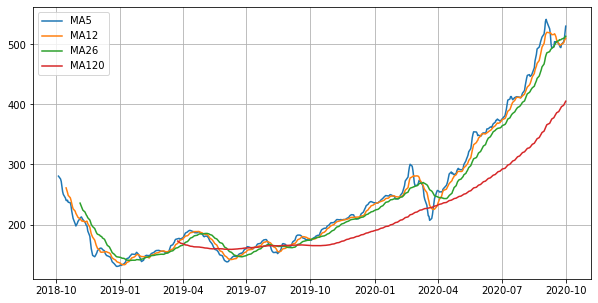

In [18]:
for col in ['MA5', 'MA12', 'MA26', 'MA120']:
    plt.plot(data.index, data[col], label=col)
    
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (15, 5)
plt.grid()
plt.savefig('{}_MA.png'.format(company))
plt.show()

#### MACD (Moving Average Convergence Divergence) 구하기
1. `MACD` : MACD = EMA(12) - EMA(6) , EMA(n) : n일간의 이동평균
2. `Signal` : MACD의 9일간의 이동평균
3. `Oscillator` : MACD - Signal

In [19]:
def get_macd(df, col, short=6, long=12, t=9):
    ret = pd.DataFrame(df)
    
    ma_short = ret[col].rolling(window=short).mean()    
    ma_long = ret[col].rolling(window=long).mean()
    macd = ma_long - ma_short
    signal = macd.rolling(window=t).mean()
    oscillator = macd - signal
    
    ret = ret.assign(macd=macd, signal=signal, oscillator=oscillator).dropna()
    
    return ret

In [20]:
data = data.drop(['MA5', 'MA12', 'MA26', 'MA120'], axis=1)
macd = get_macd(data, 'Adj Close', short=12, long=26)
macd.head()

,High,Low,Open,Close,Volume,Adj Close,macd,signal,oscillator
Date,,,,,,,,,
2018-11-15,205.300003,195.500000,196.949997,202.389999,21017700.0,201.128754,8.679479,18.052478,-9.373000
2018-11-16,170.660004,161.610001,163.320007,164.429993,49088000.0,163.405304,9.819765,16.251117,-6.431352
2018-11-19,161.820007,144.630005,161.789993,144.699997,42445500.0,143.798264,12.006627,14.858631,-2.852004
2018-11-20,154.259995,133.309998,134.059998,149.080002,42300800.0,148.150970,14.160556,13.853792,0.306764
2018-11-21,155.300003,143.610001,154.619995,144.710007,25637400.0,143.808228,15.849070,13.240791,2.608279


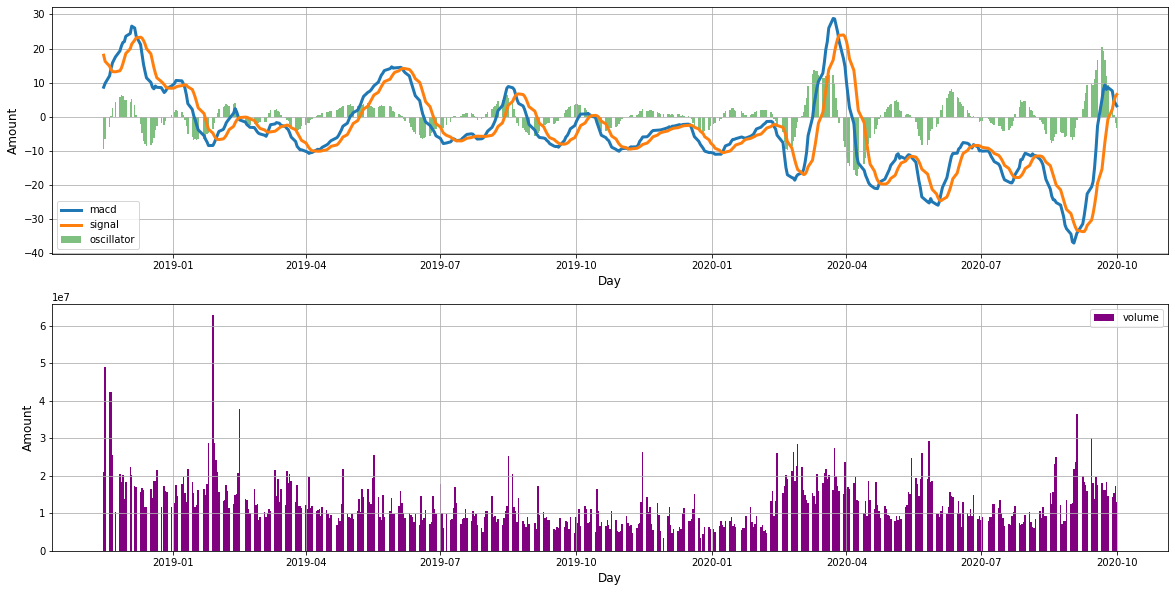

In [21]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True 

plt.subplot(2,1,1)
plt.plot(macd.index, macd['macd'], label='macd')
plt.plot(macd.index, macd['signal'], label='signal')
plt.bar(macd.index, macd['oscillator'], label='oscillator', color='green', alpha=0.5, width=1)
plt.legend(loc='best')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.subplot(2,1,2)
plt.bar(macd.index, macd['Volume'], label='volume', color='purple', width=1)
plt.legend(loc='best')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.savefig('{}_MACD.png'.format(company))
plt.show()

### PPT로 보고서 만들기

In [47]:
!pip install python-pptx

In [22]:
import datetime
from pptx import Presentation
from pptx.util import Inches

In [23]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
prs = Presentation()

In [24]:
title_slide_layout = prs.slide_layouts[0] # 0 : 제목슬라이드에 해당
slide = prs.slides.add_slide(title_slide_layout) # 제목 슬라이드를 파워포인트 객체에 추가

# 제목 - 제목에 값넣기
title = slide.shapes.title  # 제목
title.text = "주식 보고서" # 제목에 값 넣기

# 부제목
subtitle = slide.placeholders[1] # 제목상자는 placeholders[0], 부제목상자는 [1]
subtitle.text = "보고서 작성일 : {date}".format(date=today) 

In [25]:
title_only_slide_layout = prs.slide_layouts[5] 
slide = prs.slides.add_slide(title_only_slide_layout)

shapes = slide.shapes
shapes.title.text = '{company}, {close}원에 거래 마감'.format(company=company, close=data.iloc[-1]['Close'])
print(shapes.title.text)

left = Inches(0.5)
height = Inches(2.5)
width = Inches(9)
top = Inches(2)

# 테이블 추가
img_path = '{company}_table.png'.format(company=company)

pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)

NVIDA, 544.5800170898438원에 거래 마감


In [26]:
title_only_slide_layout = prs.slide_layouts[5] 
slide = prs.slides.add_slide(title_only_slide_layout)

shapes = slide.shapes
shapes.title.text = '{company}, Chart'.format(company=company)
print(shapes.title.text)

left = Inches(0.5)
height = Inches(2.5)
width = Inches(9)
top = Inches(2)

img_path = '{company}_OCAD.png'.format(company=company)
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)

NVIDA, Chart


In [27]:
filename = 'stock_report.pptx'
prs.save(filename)

### SMTP로 보고서를 메일로 보내기

In [54]:
import os
import smtplib

# MIME 타입 객체
from email.mime.multipart import MIMEMultipart

# 이메일 이진 데이터로 바꿔주는 인코더
from email import encoders

# 위의 모든 객체들을 생성할 수 있는 기본 객체
from email.mime.base import MIMEBase

In [55]:
SMTP_SERVER = 'smtp.naver.com'
SMTP_USER_ID = "@naver.com" # 송신자계정
SMTP_USER_PW = "" # 송신자 비밀번호
SMTP_PORT = 465

In [56]:
title = '주식 보고서 분석 자료 ({date}) 입니다'.format(date=today)
content = '주식 보고서 분석 자료 입니다'
msg_from = SMTP_USER_ID # 보내는 사람 이메일 주소
msg_to = "" # 받는 사람 이메일 주소

multi = MIMEMultipart(_subtype='mixed')

multi['Subject'] = title  # 메일 제목
multi['From'] = msg_from   # 보내는 메일
multi['To'] = msg_to       # 받는 메일

file_path="/content/"
maintype="application"
subtype="vnd.ms-powerpoint"
file_name = filename

with open(os.path.join(file_path, file_name),  'rb') as fp:
    msg = MIMEBase(maintype, subtype)
    msg.set_payload(fp.read())
    encoders.encode_base64(msg)

msg.add_header('Content-Disposition', 'attachment', filename=file_name)
multi.attach(msg)

In [57]:
with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
    # 로그인
    server.login(SMTP_USER_ID, SMTP_USER_PW)
    
    # 이메일 전송
    response = server.sendmail(msg_from, msg_to, multi.as_string())
    
    if not response:
        print('이메일 전송 완료')
    else:
        print(response)

이메일 전송 완료
